<ipython-input-3-0e4136a0e308>:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels([


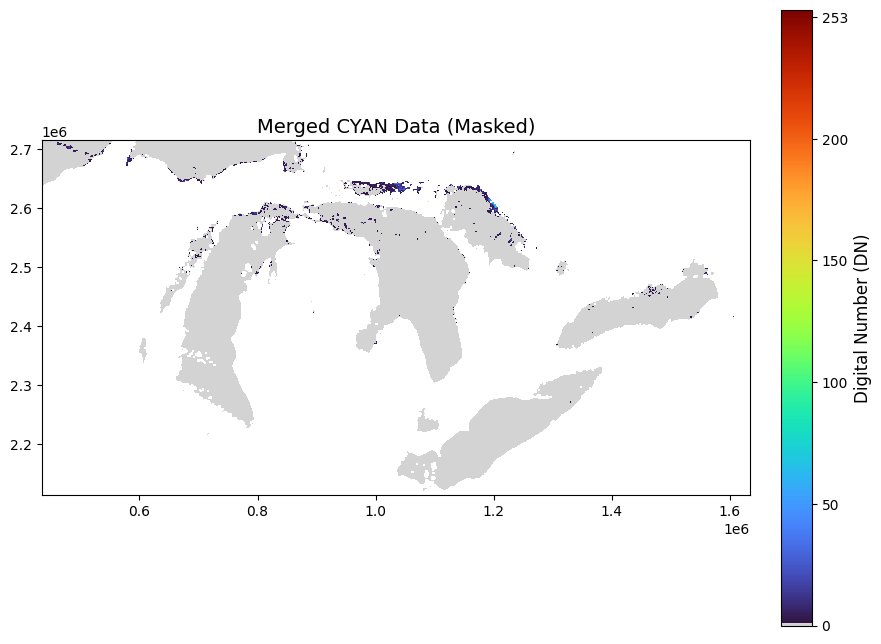

In [3]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show
from matplotlib.colors import ListedColormap
from rasterio.merge import merge

# Define file paths
file_path1 = 'L20161152016121.L3m_7D_CYAN_CI_cyano_CYAN_CONUS_300m_6_2.tif'
file_path2 = 'L20161152016121.L3m_7D_CYAN_CI_cyano_CYAN_CONUS_300m_7_2.tif'

# Open datasets
datasets = [rasterio.open(file_path1), rasterio.open(file_path2)]

# Merge datasets
merged_array, merged_transform = merge(datasets)

# Mask invalid values (DN = 254 and DN = 255)
merged_array = np.ma.masked_where((merged_array[0] >= 254), merged_array[0])

# Customize colormap
original_cmap = plt.cm.turbo
colors = original_cmap(np.linspace(0, 1, 256))
colors[0] = [0.83, 0.83, 0.83, 1.0]  # Light grey for DN = 0
custom_cmap = ListedColormap(colors)

# Plot merged data with masking applied
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(
    merged_array,
    cmap=custom_cmap,
    vmin=0,
    vmax=253,
    extent=(
        merged_transform[2],
        merged_transform[2] + merged_array.shape[1] * merged_transform[0],
        merged_transform[5] + merged_array.shape[0] * merged_transform[4],
        merged_transform[5],
    ),
)
ax.set_title('Merged CYAN Data (Masked)', fontsize=14)
ax.axis('on')

# Add colorbar
cbar = fig.colorbar(im, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
cbar.set_label('Digital Number (DN)', fontsize=12)
cbar.ax.set_yticklabels([
    '0', '50', '100', '150', '200', '253'
])
plt.show()

In [2]:
pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 68.6 MB/s eta 0:00:00
